## Text Mining Assignment Q1

#### 1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
import nltk
import spacy
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Read the data
data = pd.read_csv('Elon_musk.csv',encoding='cp1252', error_bad_lines=False,index_col=0)
data

,Text
1,@kunalb11 I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
#Removing the trailing and leading characters
data['Text'] = data['Text'].str.strip()

In [4]:
# Removing the empty strings, because they are considered in Python as False
data.dropna(subset=['Text'], inplace=True)
data

,Text
1,@kunalb11 I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
# Stopwords

In [6]:
nltk.download('stopwords')
my_stopwords = stopwords.words('english')
my_stopwords[0:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [7]:
#removing stopwords
data['Text'] = data['Text'].apply(lambda x: ' '.join([x for x in x.split() if x not in (my_stopwords)]))
data['Text']

1                                     @kunalb11 I’m alien
2       @ID_AA_Carmack Ray tracing Cyberpunk HDR next-...
3                     @joerogan @Spotify Great interview!
4                            @gtera27 Doge underestimated
5       @teslacn Congratulations Tesla China amazing e...
                              ...                        
1995    @flcnhvy True, sounds surreal, negative propag...
1996    @PPathole Make sure read ur terms &amp; condit...
1997                  @TeslaGong @PPathole Samwise Gamgee
1998    @PPathole Altho Dumb Dumber <U+0001F525><U+000...
1999                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [8]:
#removing punctuations
data['Text'] = data['Text'].str.replace(r'[^\w\s]+', '')
data['Text'] 

1                                       kunalb11 Im alien
2       ID_AA_Carmack Ray tracing Cyberpunk HDR nextle...
3                        joerogan Spotify Great interview
4                             gtera27 Doge underestimated
5       teslacn Congratulations Tesla China amazing ex...
                              ...                        
1995    flcnhvy True sounds surreal negative propagand...
1996    PPathole Make sure read ur terms amp condition...
1997                    TeslaGong PPathole Samwise Gamgee
1998        PPathole Altho Dumb Dumber U0001F525U0001F525
1999                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [9]:
#Converting to lower case 
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data

,Text
1,kunalb11 im alien
2,id_aa_carmack ray tracing cyberpunk hdr nextle...
3,joerogan spotify great interview
4,gtera27 doge underestimated
5,teslacn congratulations tesla china amazing ex...
...,...
1995,flcnhvy true sounds surreal negative propagand...
1996,ppathole make sure read ur terms amp condition...
1997,teslagong ppathole samwise gamgee
1998,ppathole altho dumb dumber u0001f525u0001f525


In [10]:
# Stemming
st = PorterStemmer()
data['Text'] = data['Text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
data['Text']

1                                       kunalb11 im alien
2       id_aa_carmack ray trace cyberpunk hdr nextleve...
3                        joerogan spotifi great interview
4                                 gtera27 doge underestim
5       teslacn congratul tesla china amaz execut last...
                              ...                        
1995    flcnhvi true sound surreal neg propaganda stil...
1996    ppathol make sure read ur term amp condit clic...
1997                       teslagong ppathol samwis gamge
1998         ppathol altho dumb dumber u0001f525u0001f525
1999                             progress updat august 28
Name: Text, Length: 1999, dtype: object

## Sentiment analysis

In [11]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [12]:
#Slicing the text
from itertools import islice
def take(n,iterable):
    "Return first n items of the iterable as list"
    return list(islice(iterable,n))

In [13]:
#coverting to dic format and for 20 words
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20,affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [14]:
#Function to calculate the sentiment score
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(Text: str = None):
    sent_score = 0
    if Text:
        Text = nlp(Text)
        for word in Text:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [15]:
#calulating the sentiment value for each sentence
data['sentiment_value'] = data['Text'].apply(calculate_sentiment)
data['sentiment_value']

1       0
2       0
3       3
4       0
5       0
       ..
1995   -2
1996    1
1997    0
1998   -3
1999    2
Name: sentiment_value, Length: 1999, dtype: int64

In [16]:
#word count for "clean"column
data['word_count'] = data['Text'].str.split().apply(len)
data['word_count'].head(10)

1      3
2      9
3      4
4      3
5     12
6      5
7      9
8      5
9      9
10     4
Name: word_count, dtype: int64

In [17]:
#sort based on sentiment value
data.sort_values(by='sentiment_value').head(10)

,Text,sentiment_value,word_count
187,naval some tyranni also road hell mostli pave ...,-7,10
1718,neuro_skept they dont fire onc some go sever s...,-6,17
1976,rationaletienn flcnhvi ppathol ihearttesla dea...,-5,7
1534,ppathol the earli investor part tesla wrong th...,-5,16
1016,enn_nafnlau there sketchi edit tesla wiki whit...,-5,13
894,pcgamer fear 2 best imo also dead space 2 they...,-5,12
784,ye damn cooki browser set,-4,5
542,engineers_fe paint make hell differ,-4,5
1306,sn8 starship flap amp nosecon done week then s...,-4,18
710,mario_livio hell wig collect,-4,4


In [18]:
data['sentiment_value'].describe()

count    1999.000000
mean        0.521261
std         1.571908
min        -7.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: sentiment_value, dtype: float64

In [19]:
#sentiment value less than or equal to 0
data[data['sentiment_value']<0]

,Text,sentiment_value,word_count
7,frodo underdog all thought would fail himself ...,-2,9
21,freewalletorg ani crypto wallet wont give priv...,-1,10
22,freewalletorg your app suck,-3,4
26,rationaletienn adamklotz_ starlink staggeringl...,-1,12
33,sruhl everyon tesla receiv stock my comp stock...,-2,14
...,...,...,...
1977,thatt3slaguy flcnhvi ppathol ihearttesla earn ...,-1,14
1991,kenyanwalstreet not actual payout vest stock o...,-1,16
1992,ihearttesla no easi way answer tweet help dire...,-2,15
1995,flcnhvi true sound surreal neg propaganda stil...,-2,13


In [20]:
#sentiment value greater than 0
data[data['sentiment_value']>0]

,Text,sentiment_value,word_count
3,joerogan spotifi great interview,3,4
8,owensparks_ flcnhvi anonyx10 haha thank,5,5
10,the entertain outcom like,2,4
17,freewalletorg thank fix,2,3
20,thi true power haha httpstcofc9uhqsd7o,3,5
...,...,...,...
1987,best use term full stack,3,5
1988,ppathol ihearttesla for sure thi great amp ter...,3,15
1990,buzzindelhi sorri hope soon,2,4
1996,ppathol make sure read ur term amp condit clic...,1,10


In [21]:
#sentiment value equal to 0
data[data['sentiment_value']==0]

,Text,sentiment_value,word_count
1,kunalb11 im alien,0,3
2,id_aa_carmack ray trace cyberpunk hdr nextleve...,0,9
4,gtera27 doge underestim,0,3
5,teslacn congratul tesla china amaz execut last...,0,12
6,happi new year ox httpstco9wfkmyu2oj,0,5
...,...,...,...
1985,burakaydik true,0,2
1989,redmerci ye,0,2
1993,ai symbiosi u wait,0,4
1994,vistacruiser7 flcnhvi there,0,3


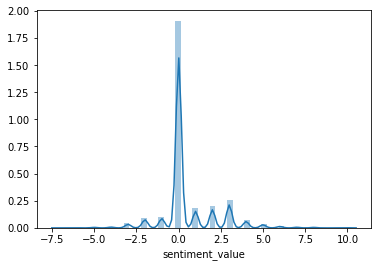

In [22]:
#density plot based on sentiment value

sns.distplot(data['sentiment_value'])

In [23]:
# Creating an index column
data['index']=range(0,len(data))

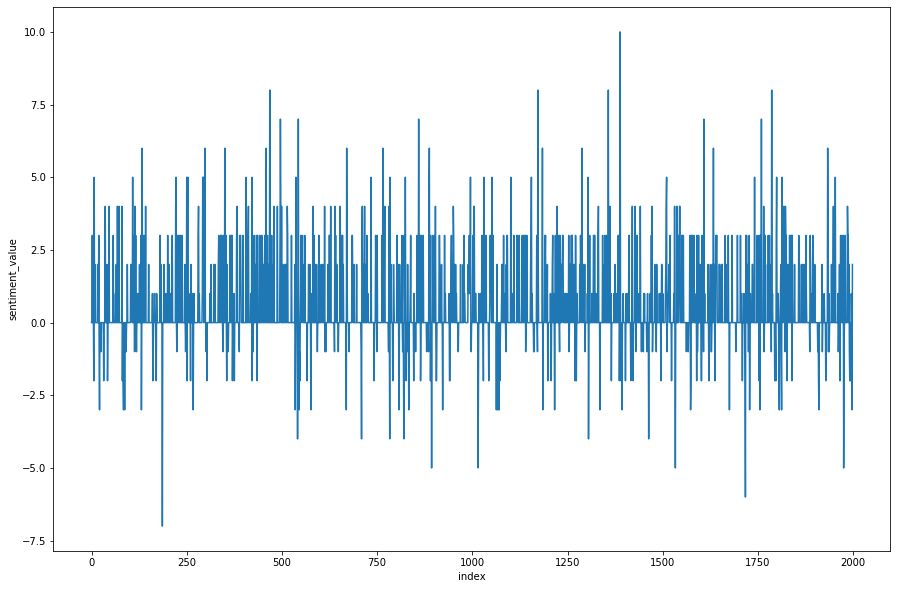

In [24]:
#lineplot based on sentiment value
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x = 'index',data=data)

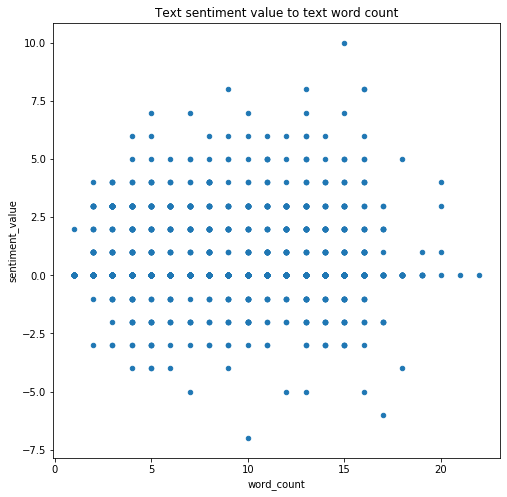

In [25]:
#scatter plot between wordcount and sentiment value
data.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Text sentiment value to text word count')

### After performing the sentiment analysis, most of the tweets are neutral and there are more no of positive tweets than the negative tweets.
